In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=sns.load_dataset('mpg')
df=data

In [58]:
df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [8]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [9]:
df.columns.tolist()

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model_year',
 'origin',
 'name']

In [13]:
print('No of rows',df.shape[0])

No of rows 398


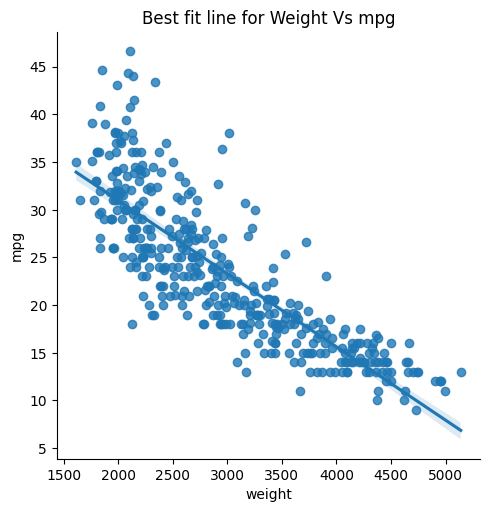

In [20]:
Simple_regression
sns.lmplot(x='weight'
           ,y='mpg'
           ,data=df)
plt.title('Best fit line for Weight Vs mpg')
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

In [52]:
y = df['mpg']

In [53]:
X_simple = df[['weight']]  # Must be a 2D DataFrame
X_multi = df[['weight', 'horsepower', 'cylinders']]
X_poly = df[['horsepower']]

In [54]:
rs = 42

In [32]:
X_simple_train, X_simple_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=rs)

In [37]:
model_simple = LinearRegression()
model_simple.fit(X_simple_train, y_train)
print('Done Training!')

Done Training!


In [34]:
preds_simple = model_simple.predict(X_simple_test)

In [35]:
r2_simple = r2_score(y_test, preds_simple)
rmse_simple = np.sqrt(mean_squared_error(y_test, preds_simple))

In [36]:
print(f"--- Simple Linear Regression (mpg ~ weight) ---")
print(f"R-squared (R²): {r2_simple:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_simple:.4f} mpg")

--- Simple Linear Regression (mpg ~ weight) ---
R-squared (R²): 0.7230
Root Mean Squared Error (RMSE): 3.8594 mpg


In [41]:
#This tells you that 72.3% of the change (or "variance") in a car's mpg is explained by its weight
#When my model predicts a car's mpg, it is, on average, wrong by about 3.86 mpg.

In [39]:
new_data = [[3000]]
# Do this (this is the best-practice way):
new_data_df = pd.DataFrame(data=[[3000]], columns=['weight'])
# Now when you predict, there's no warning because the names match
predicted_mpg = model_simple.predict(new_data_df)
print(f"Prediction for a 3000 lbs car: {predicted_mpg[0]:.2f} mpg")

Prediction for a 3000 lbs car: 23.37 mpg
